# Coding Use Cases - Example 1 - Algorithmic Trading

# Imports 

In [1]:
from __future__ import division

import pandas as pd
import matplotlib.pyplot as plt

# Defining some Variables that we will be using

In [2]:
comma = ","
filename='GOOG_09_Dec_2013-2018.csv'
path='' # Blank := local file
file_location=path+filename

# Reading and manipulating our data

In [3]:
all_data = pd.read_csv(file_location)
all_data_of_interest = pd.concat([all_data['Date'], all_data['Close']], axis=1, keys=['Date', 'Price'])

earliest_year = int(all_data_of_interest['Date'][0].split("-")[0])
latest_year = int(all_data_of_interest['Date'][all_data_of_interest.shape[0]-1].split("-")[0])

years = range(earliest_year,latest_year+1)
data_per_year = dict.fromkeys(years,pd.DataFrame())

for row_number in range(all_data_of_interest.shape[0]):
    year=int(all_data_of_interest["Date"][row_number].split("-")[0])
    data_per_year[year] = data_per_year[year].append(all_data_of_interest.iloc[row_number], ignore_index=True)

# Decide When To Inest and Computing Profit

On 2013-12-09 we buy at 535.586548. Profit: -535.586548
On 2013-12-23 we sell at 553.947083. Profit: 18.360535000000027
On 2014-01-02 we buy at 552.963501. Profit: -534.6029659999999
On 2014-01-31 we sell at 586.669312. Profit: 52.06634600000007
On 2014-04-11 we buy at 527.698425. Profit: -475.632079
On 2014-07-18 we sell at 591.825806. Profit: 116.19372699999997
On 2014-10-13 we buy at 530.294128. Profit: -414.10040100000003
On 2014-12-31 we sell at 523.521423. Profit: 109.421022
On 2015-01-02 we buy at 521.9377440000001. Profit: -412.5167220000001
On 2015-10-23 we sell at 702.0. Profit: 289.4832779999999
On 2016-01-04 we buy at 741.840027. Profit: -452.35674900000004
On 2016-08-05 we sell at 782.219971. Profit: 329.86322199999995
On 2017-01-03 we buy at 786.1400150000001. Profit: -456.2767930000001
On 2017-10-27 we sell at 1019.2700199999999. Profit: 562.9932269999998
On 2018-01-02 we buy at 1065.0. Profit: -502.0067730000002
On 2018-07-13 we sell at 1188.819946. Profit: 686.81317299

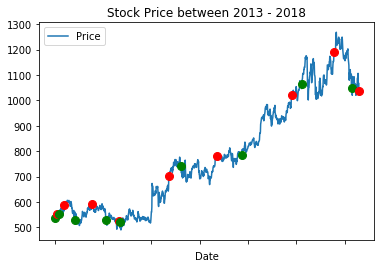

In [4]:
initial_entry_position = 0
profit = 0
markerSize = 8
all_data_of_interest.plot(x='Date', y='Price', style='-')    
plt.title("Stock Price between {0} - {1}".format(earliest_year, latest_year))
plottingPositionCouter = 0

for yearOfInterest in years: 
    position = "None"
    average_price = data_per_year[yearOfInterest]["Price"].mean()
    stdev_price = data_per_year[yearOfInterest]["Price"].std()
    buy_at = average_price-1*stdev_price
    sell_at = average_price+1*stdev_price

    for row in range(data_per_year[yearOfInterest].shape[0]):
        plottingPositionCouter = plottingPositionCouter + 1
        todays_date = data_per_year[yearOfInterest]["Date"][row]
        todays_price = data_per_year[yearOfInterest]["Price"][row]
        if(position=="None"):
            if(initial_entry_position==0):
                initial_entry_position = todays_price
            if(todays_price<sell_at):
                position="Buy"
                profit=profit-todays_price
                print("On {2} we buy at {0}. Profit: {1}".format(todays_price,profit,todays_date))
                plt.plot(plottingPositionCouter, todays_price, marker='o', markersize=markerSize, color="green")
            else:
                position="Sell"
                profit=profit+todays_price
                print("On {2} we sell at {0}. Profit: {1}".format(todays_price,profit,todays_date))
                plt.plot(plottingPositionCouter, todays_price, marker='o', markersize=markerSize, color="red")
        elif(position=="Buy"):
            if(todays_price>=sell_at):
                position="Sell"
                profit=profit+todays_price
                print("On {2} we sell at {0}. Profit: {1}".format(todays_price,profit,todays_date))
                plt.plot(plottingPositionCouter, todays_price, marker='o', markersize=markerSize, color="red")
        elif(position=="Sell"):
            if(todays_price<=buy_at):
                position="Buy"
                profit=profit-todays_price
                print("On {2} we buy at {0}. Profit: {1}".format(todays_price,profit,todays_date))
                plt.plot(plottingPositionCouter, todays_price, marker='o', markersize=markerSize, color="green")

    if(position=="Buy"):
        position="None"
        profit=profit+todays_price
        position="None"
        print("On {2} we sell at {0}. Profit: {1}".format(todays_price,profit,todays_date))
        plt.plot(plottingPositionCouter, todays_price, marker='o', markersize=markerSize, color="red")

print("")
print("")
print("Profit made per {0} invested: {1}".format(initial_entry_position,profit))
print("If we invested {0} on {1} today we would have {2}".format(initial_entry_position,
        all_data_of_interest['Date'][0],initial_entry_position+profit))
print("Percentage profit made: {0}%".format((profit*100)/initial_entry_position))

plt.show()